In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Path = '/content/drive/MyDrive/Colab Notebooks/'

In [4]:
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nwdaf_train.csv')
train_set.head()

,t,cell_id,cat_id,pe_id,load,has_anomaly,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
0,0,0,0,0,4.997074,0,0.000000,0.000000,0.000000,120.273863,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0,1,16.004322,0,4.997074,4.997074,4.997074,220.273863,120.273863,0.000000,4.997074,4.997074,4.997074
2,0,0,0,2,52.985386,0,10.500698,10.500698,10.500698,220.273863,202.738627,220.273863,11.007248,11.007248,6.010174
3,0,0,0,3,0.999767,0,34.494854,24.662261,24.662261,231.069230,-335.970115,290.572082,36.981064,31.983990,31.983990
4,0,0,0,4,5.000597,0,26.992577,18.746637,18.746637,-98.113127,140.573616,-183.850690,-51.985619,-67.989941,-72.987015


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296000 entries, 0 to 1295999
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t                 1296000 non-null  int64  
 1   cell_id           1296000 non-null  int64  
 2   cat_id            1296000 non-null  int64  
 3   pe_id             1296000 non-null  int64  
 4   load              1296000 non-null  float64
 5   has_anomaly       1296000 non-null  int64  
 6   last2_mean        1296000 non-null  float64
 7   last4_mean        1296000 non-null  float64
 8   last8_mean        1296000 non-null  float64
 9   per_change_last2  1296000 non-null  float64
 10  per_change_last3  1296000 non-null  float64
 11  per_change_last4  1296000 non-null  float64
 12  change_last2      1296000 non-null  float64
 13  change_last3      1296000 non-null  float64
 14  change_last4      1296000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 148.3 MB


In [6]:
train_set.describe()

,t,cell_id,cat_id,pe_id,load,has_anomaly,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
count,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06
mean,8.639500e+03,2.000000e+00,1.000000e+00,2.000000e+00,2.044400e+01,7.750000e-01,2.044400e+01,2.044397e+01,2.044396e+01,1.964118e+02,1.821678e+02,-8.955450e+01,7.765488e-07,-2.044392e+01,-4.088784e+01
std,4.988308e+03,1.414214e+00,8.164969e-01,1.414214e+00,2.796243e+01,4.175825e-01,1.836114e+01,7.728815e+00,4.884219e+00,2.282726e+02,5.099480e+02,3.461546e+02,4.217896e+01,5.343585e+01,5.847180e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.586763e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.894538e+01,-4.784511e+02,-1.100894e+03,-9.800128e+01,-1.199491e+02,-1.231225e+02
25%,4.319750e+03,1.000000e+00,0.000000e+00,1.000000e+00,3.145766e+00,1.000000e+00,4.186562e+00,1.648981e+01,1.632659e+01,-3.972398e+01,5.606895e+00,-1.822128e+02,-2.000153e+00,-6.946949e+01,-9.214865e+01
50%,8.639500e+03,2.000000e+00,1.000000e+00,2.000000e+00,5.307915e+00,1.000000e+00,1.122113e+01,2.105918e+01,2.146017e+01,2.317020e+02,2.498055e+01,-4.998787e+01,4.187658e+00,-2.090062e+00,-6.577327e+01
75%,1.295925e+04,3.000000e+00,2.000000e+00,3.000000e+00,1.998009e+01,1.000000e+00,3.671978e+01,2.581806e+01,2.458612e+01,3.941615e+02,1.397648e+02,9.573781e+01,1.696077e+01,1.193041e+01,1.092316e+01
max,1.727900e+04,4.000000e+00,2.000000e+00,4.000000e+00,9.908193e+01,1.000000e+00,6.051487e+01,3.237507e+01,2.886791e+01,6.254300e+02,1.645032e+03,4.587639e+02,7.790070e+01,7.467860e+01,6.936207e+01


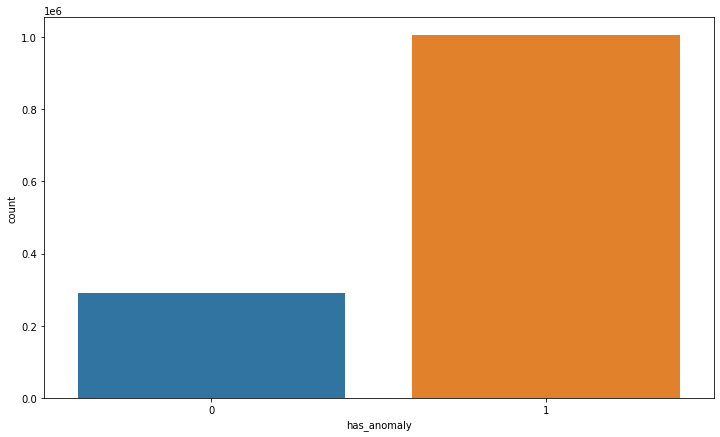

In [7]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'has_anomaly', data = train_set)

In [55]:
train_set1 = train_set[0:10000]

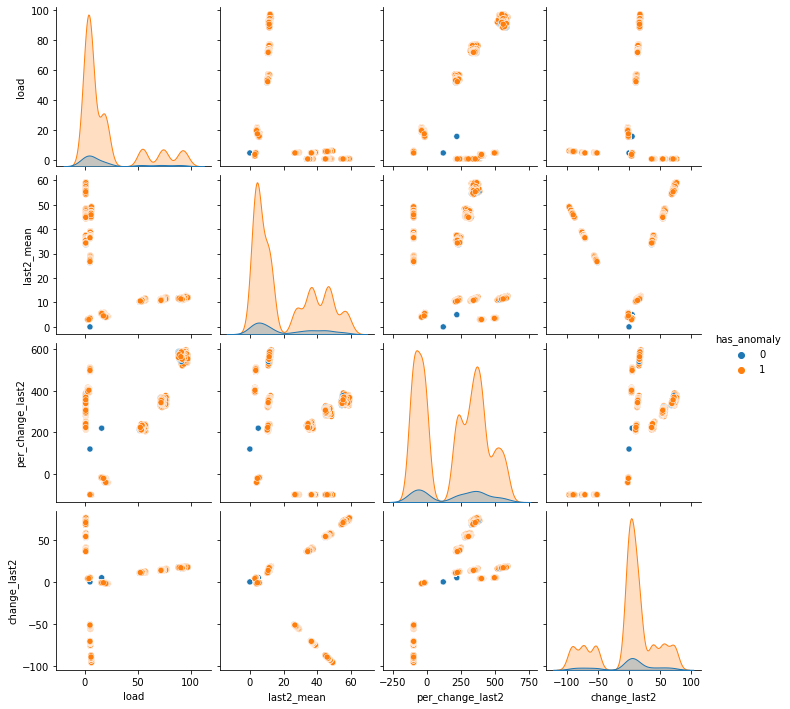

In [56]:
sns.pairplot(train_set1, hue = 'has_anomaly', vars = [ 'load', 'last2_mean', 'per_change_last2','change_last2'])

In [57]:
X = train_set1.iloc[:, 0:14].values
y = train_set1.iloc[:, 14].values

In [58]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
X_train.shape

(8000, 14)

In [61]:
X_test.shape

(2000, 14)

In [62]:
import tensorflow as tf 
ANN_model = tf.keras.models.Sequential()
ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(14, )))
ANN_model.add(tf.keras.layers.Dropout(0.2))
ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))
ANN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [63]:
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               6000      
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               160400    
                                                                 
 dropout_5 (Dropout)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 401       
                                                                 
Total params: 166,801
Trainable params: 166,801
Non-trainable params: 0
_________________________________________________________________


In [64]:
ANN_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [65]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: -306851.2188 - accuracy: 1.2500e-04
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: -5785761.0000 - accuracy: 1.2500e-04
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: -26975156.0000 - accuracy: 1.2500e-04
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: -72592832.0000 - accuracy: 1.2500e-04
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: -149375344.0000 - accuracy: 1.2500e-04
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: -262391696.0000 - accuracy: 1.2500e-04
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: -415529024.0000 - accuracy: 1.2500e-04
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: -611126208.0000 - accuracy: 1.2500e-04
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: -854136320.0000 - accuracy: 1

In [66]:
y_pred = ANN_model.predict(X_test)

In [67]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

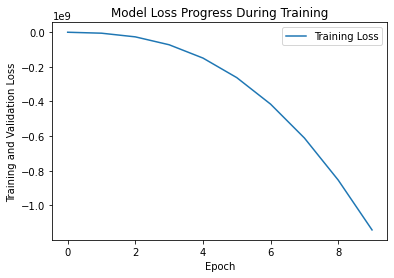

In [68]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

In [69]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
XGB_model.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimators=10, objective='multi:softprob')

In [70]:
y_predict = XGB_model.predict(X_test)

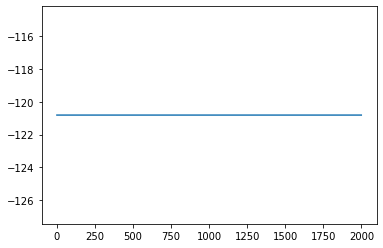

In [71]:
plt.plot(y_predict)